**Nhóm 09:**

1. Nguyễn Văn Thế

2. Lê Trung Hiếu

3. Nguyễn Thị Kim Duyên

# Giới thiệu
Theo Tổ chức Y tế thế giới (WHO), đột quỵ là lý do đứng thứ 2 gây ra tử vong và lý do đứng thứ 3 gây ra khuyết tật trên toàn cầu. Đột quỵ là hiện tượng chết đột ngột tế bào não do việc thiếu oxy khi lượng máu lên não bị mất đi do tắc nghẽn hoặc vỡ động mạch lên não. Đây cũng là nguyên nhân hàng đầu dẫn đến sa sút trí tuệ và trầm cảm. <br/>

Gần 800 nghìn người ở Mỹ trải qua 1 cơn đột quỵ mỗi năm, trong đó khoảng 3/4 là đột quỵ lần đầu tiên. 80% những cơn đột quỵ này có thể được ngăn chặn nên việc giáo dục nhận biết các triệu chứng đột quỵ là rất cần thiết. <br/>

Vậy nên mục đích của tiểu luận là xây dựng một mô hình dự đoán đột quỵ và đánh giá độ chính xác của mô hình. Trong bài tập lần này, nhóm phân tích dữ liệu nhiều biến sử dụng PCA và KMeans

# Nguồn dữ liệu

Dữ liệu được thu thập của 5110 người tham gia vào nghiên cứu này với 2995 nam và 2115 nữ, được lấy từ trang [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). Để dự đoán 1 bệnh nhân liệu có bị đột quỵ hay không dựa theo các thông tin ở đây:

**Các trường dữ liệu:**

* id: 

  *   Là số nhận dạng (ID) của bệnh nhân
  *   Là biến định lượng liên tục kiểu số

* gender: 

  *   Giới tính bệnh nhân
  *   Là biến định tính rời rạc kiểu String
  *   Nhận 1 trong các giá trị: "Male", "Female" or "Other"

* age:

  *   Tuổi của bệnh nhân
  *   Là biến định lượng liên tục kiểu số

* hypertension:

  *   Chứng cao huyết áp của bệnh nhân
  *   Là biến định tính rời rạc kiểu số
  *   Nhận 1 trong 2 giá trị: 0 nếu bệnh nhân không bị cao huyết áp và 1 nếu bệnh nhân mắc cao huyến áp

* heart_disease: 
  *   Tình trạng đau tim của bệnh nhân
  *   Là biến định tính rời rạc kiểu số
  *   Nhận 1 trong 2 giá trị: 0 nếu bệnh nhân không bị đau tim, và 1 nếu bệnh nhân bị đau tim

* ever_married:
  *   Tình trạng hôn nhân của bệnh nhân
  *   Là biến định tính rời rạc kiểu String
  *   Nhận 1 trong các giá trị: "No" nếu chưa kết hôn hoặc "Yes" nếu đã kết hôn
 
* work_type: 
  *   Loại nghề nghiệp của bệnh nhân
  *   Là biến định tính rời rạc kiểu String
  *   Nhận 1 trong các giá trị: "children", "Govt_jov", "Never_worked", "Private" hoặc "Self-employed"

* Residence_type: 
  *   Nơi cư trú của bệnh nhân
  *   Là biến định tính rời rạc kiểu String
  *   Nhận 1 trong các giá trị: "Rural" hoặc "Urban"

* avg_glucose_level: 
  *   Lượng đường trung bình trong máu của bệnh nhân
  *   Là biến định lượng liên tục kiểu số

* bmi:
  *   Chỉ số đo lường cơ thể BMI của bệnh nhân
  *   Là biến định lượng liên tục kiểu số

* smoking_status: 
  *   Tình trạng hút thuốc của bệnh nhân
  *   Là biến định tính rời rạc kiểu String
  *   Nhận 1 trong các giá trị: "formerly smoked", "never smoked", "smokes" or "Unknown"
* stroke:
  *   Tình trạng đột quỵ của bệnh nhân
  *   Là biến định tính rời rạc kiểu số
  *   Nhận 1 trong 2 giá trị: 0 nếu bệnh nhân không bị đột quỵ, và 1 nếu bệnh nhân bị đột quỵ

# Import các thư viện và dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [2]:
data = pd.read_csv('data/stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data cleaning

In [3]:
# chiều dữ liệu
print(data.shape)
# thông tin của dữ liệu
print(data.info())
# đếm số lượng bản ghi NaN theo biến
# print(data.isna().sum())

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [4]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Có 201 người bị thiếu thông tin về chỉ số BMI. 1 cách đơn giản ta có thể xóa các dòng dữ liệu này tuy nhiên cần kiểm tra lại để chắc chắn thông tin của 201 người này không ảnh hưởng đến kết quả dự đoán sau này

In [5]:
data[data['bmi'].isna() & data['stroke'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


Thấy rằng có 40 người thiếu thông tin BMI đã từng bị đột quỵ (trên tổng số 249 người bị đột quỵ) là một tỉ lệ lớn, nên để chắc chắn ta sẽ thay thế các dữ liệu BMI thiếu bằng trung bình của BMI các dữ liệu quan sát.

In [6]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Thống kê mô tả dữ liệu

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## ID

In [8]:
data.id.nunique()

5110

Thấy rằng tổng số id bằng với số dòng dữ liệu, ở đây ta không cần định danh từng dòng dữ liệu nữa nên sẽ bỏ cột này đi.

In [9]:
data.drop(columns=['id'], inplace=True)
data.shape

(5110, 11)

## Gender

In [10]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Ta thấy giới tính "Other" ở đây chỉ có 1 dòng dữ liệu, nên sẽ sử dụng trung vị của Gender thay cho giới tính này.

In [11]:
data['gender'].replace('Other', list(data['gender'].mode().values)[0], inplace=True)

data['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

# EDA

## Phân tích biến định tính

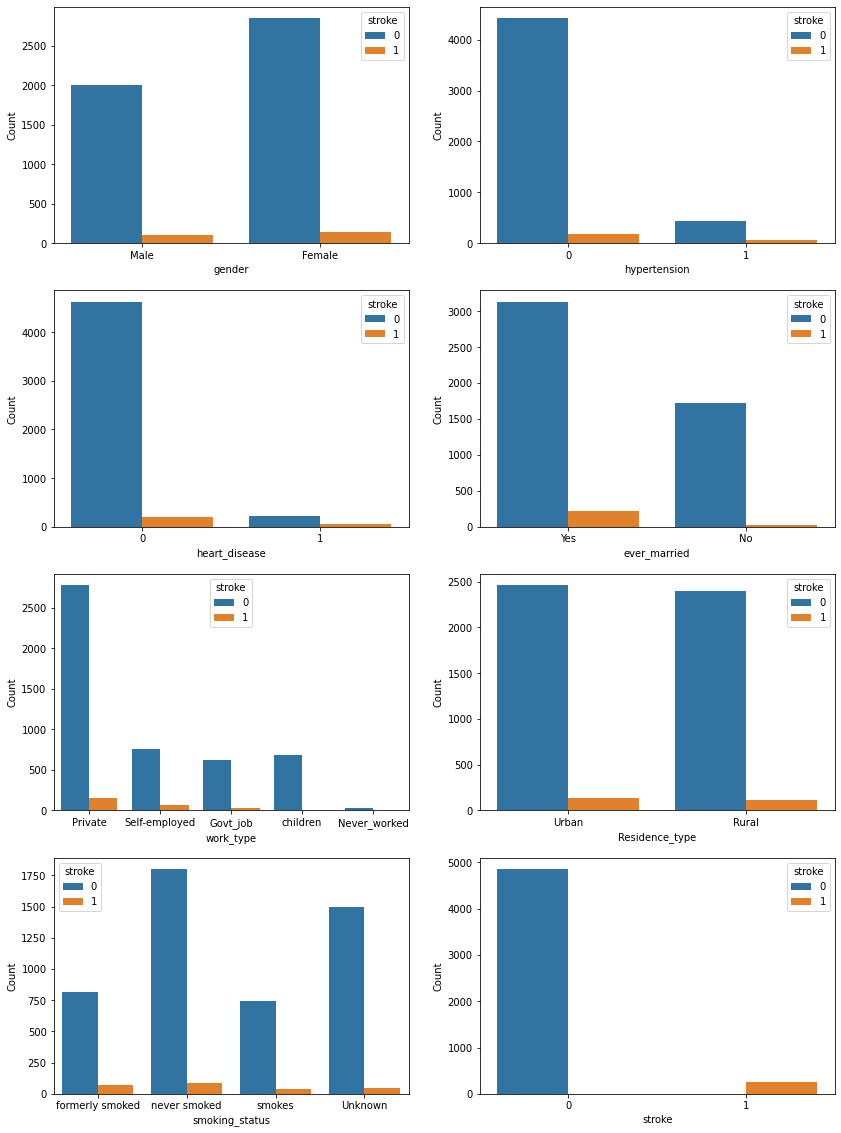

In [12]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type',
'Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4,2, figsize=(14,20))
axs = axs.flatten()

for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax = axs[i], hue='stroke')
    axs[i].set_xlabel(f'{col_name}')
    axs[i].set_ylabel('Count')

Quan sát thấy:

* gender: Không có sự khác biệt nhiều giữa tỉ lệ người bị đột quỵ giữa 2 giới tính.

* hypertension: những người cao huyết áp có nguy cơ cao bị đột quỵ (trên biểu đồ do dữ liệu nhỏ nên đang thể hiện không rõ ràng - quan sát này dựa trên tìm hiểu cá nhân)

* heart_disease: những người được chẩn đoán mắc bệnh tim cũng có nguy cơ cao bị đột quỵ.

* ever_married: những người đã kết hôn có nguy cơ cao bị đột quỵ

* work_type: những người có kinh nghiệm làm việc và các công việc có liên quan đến nhà nước có nguy cơ cao bị đột quỵ, những người chưa đi làm hiếm khi bị đột quỵ.

* residence_type: không có mối liên quan rõ ràng giữa biến này với việc bị đột quỵ.

* smoking_status: Những người từng hút thuốc hoặc đang hút thuốc tăng nguy cơ bị đột quỵ.

## Phân tích biến định lượng

In [13]:
df_num = ['age', 'avg_glucose_level', 'bmi']

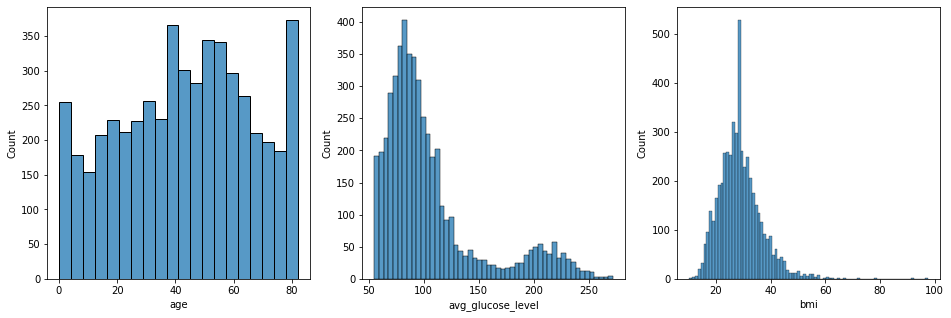

In [14]:
fig1, axs1 = plt.subplots(1, 3, figsize=(16,5))
axs1 = axs1.flatten()
for i, col_name in enumerate(df_num):
    sns.histplot(x=col_name, data=data, ax = axs1[i])
    axs1[i].set_xlabel(f'{col_name}')

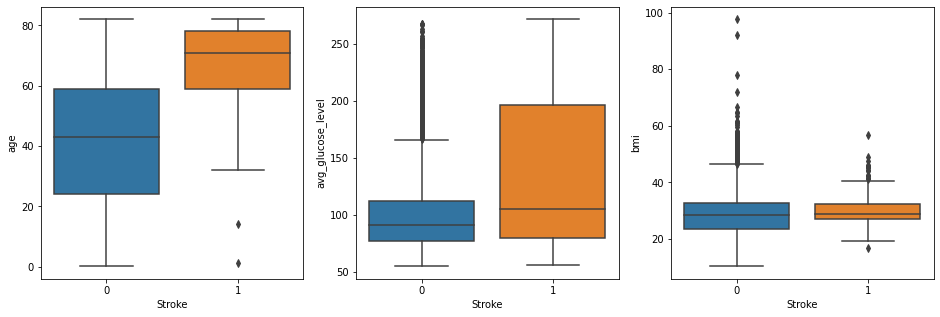

In [15]:
fig2, axs2 = plt.subplots(1, 3, figsize=(16,5))
axs2 = axs2.flatten()
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=data, ax=axs2[i])
    axs2[i].set_xlabel("Stroke")
    axs2[i].set_ylabel(f"{col_name}")

Quan sát thấy:

* age: những người bị đột quỵ thường có độ tuổi trung bình cao hơn những người không bị. Những người ở độ tuổi >60 có nguy cơ bị đột quỵ cao hơn. Có 1 vài outlier là những người ở độ tuổi 20 bị đột quỵ, có thể coi là dữ liệu hợp lệ vì đột quỵ còn phụ thuộc vào lối sống và cách ăn uống. Những người không bị đột quỵ đều trong độ tuổi từ 20 - dưới 60.

* avg_glucose_level: những người bị đột quỵ có xu hướng trung bình đường huyết cao hơn những người không bị. Có khá nhiều outliers bệnh nhân không bị đột quỵ.

* bmi: chỉ số bmi không cho biết nhiều về khả năng bị đột quỵ. Tuy nhiên ta thấy có rất nhiều outlier ở biến này. 

In [16]:
bmi_outliers = data.loc[data['bmi'] > 50]
bmi_outliers['bmi'].shape

(79,)

Có tất cả 79 outliers của bmi. Qua tìm hiểu thì thấy chỉ số BMI của những người rất béo phì là 50 -> ta sẽ thay thế các outlier bằng giá trị này để giảm thiểu số lượng outlier.

In [17]:
data['bmi'] = pd.to_numeric(data['bmi'])
data['bmi'] = data['bmi'].apply(lambda x: 50 if x > 50 else x)

<AxesSubplot:xlabel='bmi'>

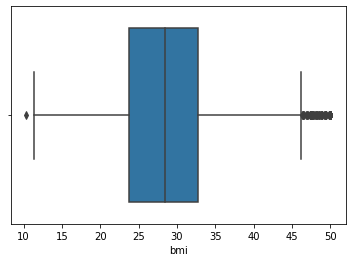

In [18]:
sns.boxplot(data=data, x='bmi')

In [19]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

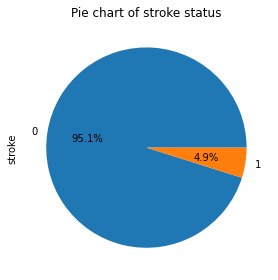

In [20]:
plt.figure(figsize=(4,4))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie chart of stroke status')
plt.tight_layout()

Ta thấy bộ dữ liệu có sự mất cân bằng khá lớn. Chỉ có 4.9% số quan sát trong mẫu đã từng bị đột quỵ.

## Phân tích đa cộng tuyến
Việc phân tích tương quan chỉ chấp nhận các biến định lượng nên ta cần chuyển các biến định tính về các giá trị 0, 1. Ở đây ta dùng LabelEncoder từ thư viện sklearn.preprocessing để làm việc này.

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

df_en = data
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


<AxesSubplot:>

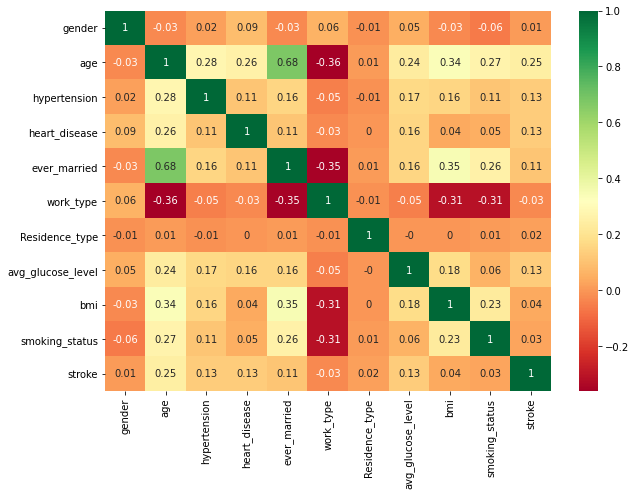

In [22]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn')

Từ biểu đồ heatmap ở trên ta thấy có xuất hiện hiện tượng đa cộng tuyến giữa 1 vài biến. VD biến ever_married và age có tương quan lên đến 0.68. Giữa 2 biến này ta thấy age có tương quan với stroke cao hơn nên ta sẽ bỏ ever_married.

Đồng thời ta cũng thấy sự tương quan giữa biến phụ thuộc "stroke" với các biến "age", "hypertension", "heart_disease", "avg_glucose_level". Dưới đây là dữ liệu sau khi đã bỏ biến "ever_married"

In [23]:
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1


## Normalize lại dữ liệu

Các biến được đo lường ở các tỉ lệ khác nhau sẽ không đóng góp như nhau vào việc fitting mô hình, và có thể tạo ra sai lệch. Để giải quyết vấn đề này, ta sử dụng các tiêu chuẩn ($\mu=0, \sigma=1$) để chuẩn hóa lại các tỉ lệ này. Ở đây ta dùng thư viện StandardScaler() cho các biến "avg_glucose_level", "bmi", "age"

In [24]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
cols = ['avg_glucose_level','bmi','age']

# df_en['age'] = df_en['age'].apply(lambda x: np.log(x+10)*3)
# df_en['avg_glucose_level'] = df_en['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
# df_en['bmi'] = df_en['bmi'].apply(lambda x: np.log(x+10)*2)

std_scaled = s.fit_transform(df_en[cols])

std_scaled = pd.DataFrame(std_scaled, columns=cols)
df_en = df_en.drop(columns=cols, axis=1)
std_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [25]:
df = pd.concat([df_en, std_scaled], axis=1)
df.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.066746,1.051434
1,0,0,0,3,0,2,1,2.121559,0.013363,0.786070
2,1,0,1,2,0,2,1,-0.005028,0.506346,1.626390
3,0,0,0,2,1,3,1,1.437358,0.766044,0.255342
4,0,1,0,3,0,2,1,1.501184,-0.655458,1.582163


# Phân tích dữ liệu nhiều biến

## Phân tích nhân tố PCA



Principal Component Analysis (PCA) là một kỹ thuật giảm chiều tuyến tính được sử dụng để trích xuất thông tin từ không gian nhiều nhiều bằng cách chiếu vào không gian con ít chiều hơn. PCA cố gắng bảo toàn các phần cơ bản có nhiều biến đổi của dữ liệu và loại bỏ các thành phần không cơ bản với ít biến đổi hơn

Chiều của dữ liệu chính là các tính năng (features) đại diện của dữ liệu

PCA là kỹ thuật giảm chiều không giám sát, có thể phân cụm các điểm dữ liệu tương tự dựa trên mối tương quan tính năng giữa chúng mà không cần tới giám sát (hoặc nhãn) nào cần gán trước.

Người ta sử dụng PCA nhằm 2 mục đích:
- Trực quan hóa dữ liệu: Khi làm việc với dữ liệu, 1 vấn đề đặt ra là khó khăn trong số lượng lớn dữ liệu và các tính năng định nghĩa dữ liệu. Để giải quyết vấn đề này, ta cần khám phá dữ liệu, tìm ra các tính năng tương quan với nhau thế nào hoặc hiểu phân bố của 1 vài tính năng. Khi trực quan hóa dữ liệu có nhiều biến ( chiều) thì việc trực quan hóa này khá khó khăn hoặc hầu như không thể. Do đó PCA giúp ta làm việc này vì PCA chiếu dữ liệu lên không gian ít chiều hơn, cho phép ta trực quan hóa dữ liệu lên không gian 2D hoặc 3D
- Tăng tốc các thuật toán học máy: Vì ý tưởng chính của PCA để giảm chiều dữ liệu, ta có thể gia tăng tốc độ huấn luyện các thuật toán học máy và thời gian testing 1 cách đáng kể so với lúc dữ liệu nguyên bản có nhiều nhiều và tốc độ huấn luyện của các thuật toán lúc này là rất chậm

Các nhân tố chính (principal components) là chìa khóa của PCA, đại diện cho những gì bên dưới lớp dữ liệu của bạn. Khi dữ liệu được chiếu vào 1 chiều thấp hơn ( giả sử 3 chiều) từ 1 không gian nhiều chiều hơn, thì 3 chiều này không gì khác ngoài 3 thành phần chính nắm ( hoặc lưu giữ) hầu hết các phương sai (thông tin) của tập dữ liệu.


**a. Sử dụng PCA để trực quan hóa dữ liệu:**

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
fit = pca.fit(df.drop(['stroke'],axis=1))
print('Explained variation per principal component:{}'.format(fit.explained_variance_ratio_))

Explained variation per principal component:[0.35955993 0.17614438 0.14043711 0.11736675 0.10348858 0.04188546
 0.04023012 0.0131896  0.00769807]


Sau khi có các thành phần chính, ta có thể tìm explained_variance_ratio. Số này cung cấp cho chúng ta về tỉ lệ thông tin hoặc phương sai của mỗi thành phần chính giữ sau khi chiếu dữ liệu lên không gian con ít chiều hơn. 

Từ số liệu trên, ta quan sát được principal component 1 chiếm tới 35,9% thông tin, trong khi principal component 2 chiếm 17,6% thông tin. Đồng thời, lưu ý rằng còn 46.5% thông tin đang bị mất nằm ở chiều dữ liệu khác

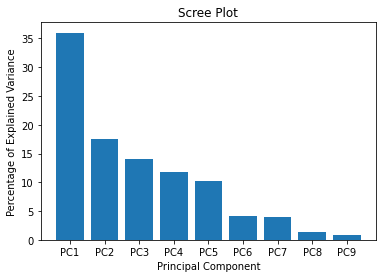

In [27]:
df_features=df.drop(['stroke'],axis=1)
#pca_data=pca.transform(df_features)
per_var=np.round(fit.explained_variance_ratio_*100,decimals=1)
labels=['PC' + str(x) for x in range(1,len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [28]:
dfpca = pd.DataFrame(pca.components_, columns=list(df_features.columns))
dfpca.head(15)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age
0,-0.019819,0.047464,0.024368,-0.545629,0.004076,0.461444,0.225830,0.444392,0.487461
1,0.049757,0.050066,0.038031,0.336096,-0.004251,-0.392783,0.806992,0.166784,0.217395
2,0.001022,0.016879,0.008088,0.472189,-0.000512,0.791523,0.271302,-0.248364,-0.122013
3,-0.010044,0.008502,-0.020787,0.470637,-0.001463,0.057646,-0.299673,0.816647,-0.133618
4,-0.011826,0.058605,0.054201,0.379038,0.012664,-0.044564,-0.361608,-0.213273,0.819406
5,0.113485,0.012236,0.005562,-0.002302,-0.993291,0.005519,-0.012191,-0.002076,0.011190
6,0.990652,0.017888,0.045596,-0.019861,0.114396,0.027257,-0.043988,0.006957,0.001302
7,-0.021671,0.994834,0.028742,-0.025308,0.009433,-0.014102,-0.031983,-0.019404,-0.081736
8,-0.046359,-0.035825,0.995785,-0.012473,-0.000615,0.000037,-0.022118,0.013682,-0.064393


Ta sắp xếp theo thứ tự giảm dần các tính năng (feature) của dữ liệu đề độ ảnh hưởng tới biến đổi dữ liệu. Ta được bảng như sau:

In [29]:
loading_scores=pd.Series(pca.components_[0],index=list(df_features.columns))
sorted_loading_scores=loading_scores.abs().sort_values(ascending=False)

top_10_features=sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_features])

work_type           -0.545629
age                  0.487461
smoking_status       0.461444
bmi                  0.444392
avg_glucose_level    0.225830
hypertension         0.047464
heart_disease        0.024368
gender              -0.019819
Residence_type       0.004076
dtype: float64


Trực quan 5110 mẫu trên trục tọa độ với principal component 1 và principal component 2, từ đó giúp ta nhìn được các mẫu phân bố thế nào giữa 2 classes

In [30]:
pca_stroke=PCA(n_components=2)
principalComponents_stroke=pca_stroke.fit_transform(df.drop(['stroke'],axis=1))

In [31]:
principal_stroke_df=pd.DataFrame(data=principalComponents_stroke,
                                 columns=['principal component 1','principal component 2'])
principal_stroke_df.tail()

,principal component 1,principal component 2
5105,1.117793,-0.324046
5106,1.427624,0.963541
5107,-0.349658,-0.441069
5108,0.171409,1.189852
5109,0.306611,-0.641000


In [32]:
print('Explained variation per principal component:{}'.format(pca_stroke.explained_variance_ratio_))

Explained variation per principal component:[0.35955993 0.17614438]


Từ số liệu trên, ta quan sát được principal component 1 chiếm tới 35.9% thông tin, trong khi principal component 2 chiếm 17.6% thông tin

<Figure size 432x288 with 0 Axes>

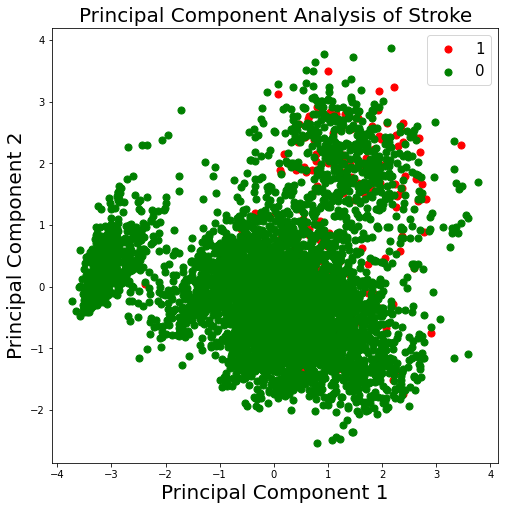

In [33]:
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principal Component 2', fontsize=20)
plt.title("Principal Component Analysis of Stroke",fontsize=20)
targets=[1,0]
colors=['r','g']
for target,color in zip(targets,colors):
  indicesToKeep=df['stroke']==target
  plt.scatter(principal_stroke_df.loc[indicesToKeep,'principal component 1']
              ,principal_stroke_df.loc[indicesToKeep,'principal component 2'],c=color,s=50)

plt.legend(targets,prop={'size':15})

**b. Tăng tốc các thuật toán học máy:**

Trước tiên tạo 1 instance của mô hình PCA. Sau đó truyền vào bao nhiêu biến đổi mà bạn muốn PCA ghi lại. Ví dụ truyền vào tham số 0.95 cho mô hình PCA có nghĩa là PCA sẽ giữ 95% của phương sai và sau đó sẽ tính ra con số n_components là số chiều cần giảm tới để giữ được 95% phương sai đó.

In [34]:
pca = PCA(n_components=0.95)
fit = pca.fit(df.drop(['stroke'],axis=1))
print('Explained variation per principal component:{}'.format(fit.explained_variance_ratio_))

Explained variation per principal component:[0.35955993 0.17614438 0.14043711 0.11736675 0.10348858 0.04188546
 0.04023012]


In [35]:
df_features=df.drop(['stroke'],axis=1)
dfpca = pd.DataFrame(pca.components_, columns=list(df_features.columns))
dfpca.head(15)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age
0,-0.019819,0.047464,0.024368,-0.545629,0.004076,0.461444,0.225830,0.444392,0.487461
1,0.049757,0.050066,0.038031,0.336096,-0.004251,-0.392783,0.806992,0.166784,0.217395
2,0.001022,0.016879,0.008088,0.472189,-0.000512,0.791523,0.271302,-0.248364,-0.122013
3,-0.010044,0.008502,-0.020787,0.470637,-0.001463,0.057646,-0.299673,0.816647,-0.133618
4,-0.011826,0.058605,0.054201,0.379038,0.012664,-0.044564,-0.361608,-0.213273,0.819406
5,0.113485,0.012236,0.005562,-0.002302,-0.993291,0.005519,-0.012191,-0.002076,0.011190
6,0.990652,0.017888,0.045596,-0.019861,0.114396,0.027257,-0.043988,0.006957,0.001302


In [36]:
PCA(copy=True,iterated_power='auto',n_components=0.95,random_state=None,svd_solver='auto',tol=0.0,whiten=False)
pca.n_components_

7

Vậy chỉ cần 7 features trong top 10 features ở trên ta có thể giữ lại 95% lượng thông tin.

In [37]:
top_7_features=sorted_loading_scores[0:7].index.values
print(loading_scores[top_7_features])

work_type           -0.545629
age                  0.487461
smoking_status       0.461444
bmi                  0.444392
avg_glucose_level    0.225830
hypertension         0.047464
heart_disease        0.024368
dtype: float64


# Feature selection

Tuy đã lựa chọn các biến dựa trên correlation ở trên nhưng để chắc chắn, ta sử dụng thư viện SelectKBest, f_classif để đánh lại điểm số mức độ ảnh hưởng của các biến đến biến phụ thuộc, sắp xếp theo thứ tự ảnh hưởng giảm dần.

In [38]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop(['stroke'],axis=1),df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
8,age,326.916568
2,heart_disease,94.698406
6,avg_glucose_level,90.503870
1,hypertension,84.953542
7,bmi,9.541558
3,work_type,5.340019
5,smoking_status,4.043033
4,Residence_type,1.220842
0,gender,0.424625


Ta thấy top 7 features quan trọng khi sử dụng thư viện giống với top 7 features sau khi thực hiện PCA. Tuy có khác nhau về thứ tự ảnh hưởng.

In [39]:
cols = ['age', 'heart_disease', 'avg_glucose_level', 'hypertension']
# cols = ['age', 'heart_disease', 'avg_glucose_level', 'hypertension','work_type','bmi','smoking_status']

# Cân bằng lại tập dữ liệu

In [40]:
# x = df.drop(['stroke', 'Residence_type', 'gender'], axis=1)
# y = df['stroke']
train_x, test_x, train_y, test_y = train_test_split(df[cols],df['stroke'], random_state=42, test_size=0.2)
#Splitting data
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4088, 4), (1022, 4), (4088,), (1022,))

Vì dữ liệu hiện tại mất cân bằng, nên ta sử dụng phương pháp [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) để cân bằng lại dữ liệu. Phương pháp này sẽ phân bố lại dữ liệu với các bản ghi tương đồng với các bản ghi thuộc lớp có số lượng thiểu số.

In [41]:
smote = SMOTE()
train_x, train_y = smote.fit_resample(train_x, train_y)
test_x, test_y = smote.fit_resample(test_x, test_y)

In [42]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((7802, 4), (7802,), (1920, 4), (1920,))

<AxesSubplot:xlabel='stroke', ylabel='count'>

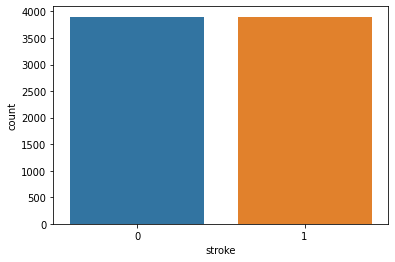

In [43]:
df_y_train = pd.DataFrame({'stroke': train_y.values})
sns.countplot(data=df_y_train, x='stroke')

Sau khi sử dụng thư viện SMOTE, ta thấy dữ liệu đã cân bằng trở lại.

In [44]:
train_x.head()

,age,heart_disease,avg_glucose_level,hypertension
0,1.582163,0,0.143384,0
1,0.830297,0,-0.393728,0
2,-0.983025,0,-1.029783,0
3,-0.540751,0,-0.893296,0
4,-0.540751,0,-1.027354,0


# Phân cụm phân cấp

Để đánh giá được số cụm phù hợp với tập dữ liệu, ở đây ta chạy thuật toán thử nghiệm số lượng cụm từ 1-10, tâm cụm sinh ngẫu nhiên, sau đó so sánh [SSE](https://en.wikipedia.org/wiki/Residual_sum_of_squares) (sum-squared-error) (Phương pháp ELBOW).

In [45]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(train_x)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

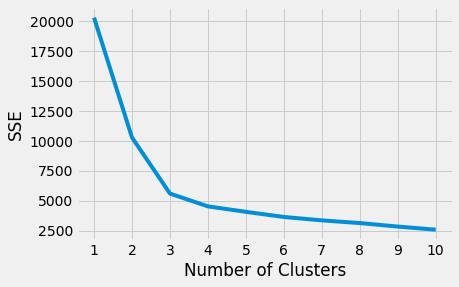

In [46]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

Thư viện KneeLocator để tìm ra được điểm elbow point thay vì nhìn bằng mắt thường.

In [47]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

Ta thấy sau khi cân bằng lại dữ liệu, với các số cụm <=3 SSE giảm rất nhiều và nhanh. Để phù hợp với bài toán dự đoán 1 bệnh nhân có bị đột quỵ hay không, ta chọn k=2

Biểu đồ phân cụm phân cấp dữ liệu theo tương quan các biến.

/home/tm/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


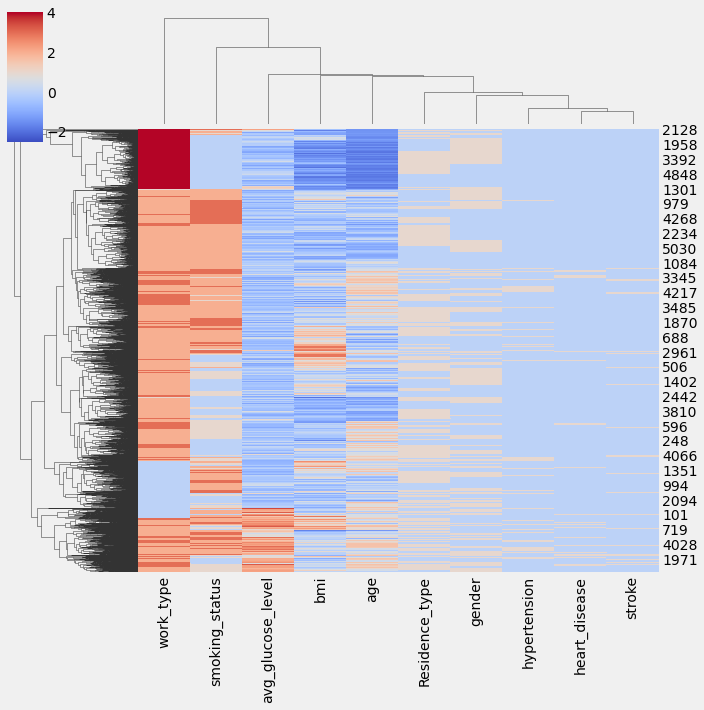

In [48]:
sns.clustermap(df, cmap='coolwarm')

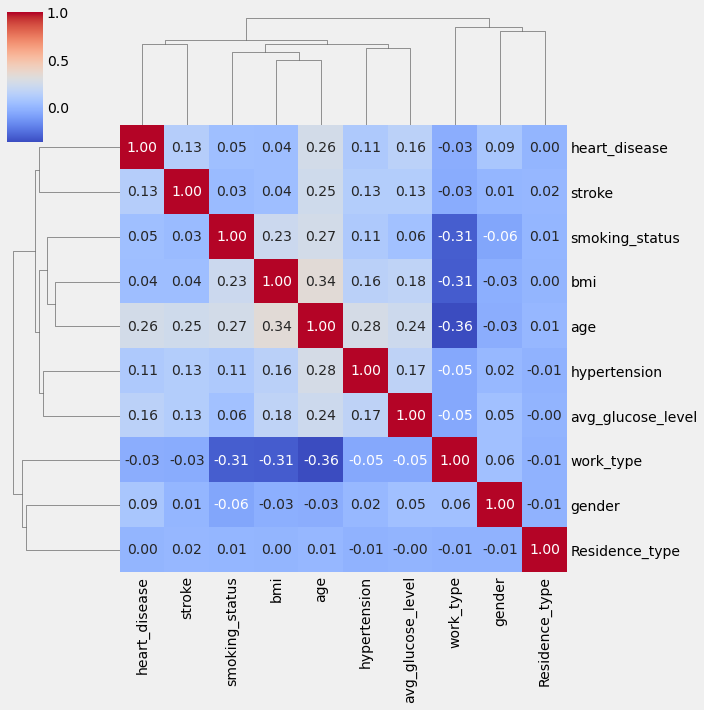

In [49]:
sns.clustermap(df.corr(), annot=True,fmt =".2f", cmap = 'coolwarm')

# Mô hình hóa



## kMeans

In [50]:
km = KMeans(n_clusters = 2, n_init=10, random_state=42)
km.fit(train_x, train_y)
y_pred = km.predict(test_x)
arg_test = {'y_true':test_y, 'y_pred':y_pred}
print('Accuracy: ',accuracy_score(test_y, y_pred).round(4))
print('F1 Score: ',f1_score(test_y, y_pred).round(4))
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

Accuracy:  0.624
F1 Score:  0.4872
[[855 105]
 [617 343]]
              precision    recall  f1-score   support

           0       0.58      0.89      0.70       960
           1       0.77      0.36      0.49       960

    accuracy                           0.62      1920
   macro avg       0.67      0.62      0.60      1920
weighted avg       0.67      0.62      0.60      1920



## XGBoost Classifier

In [51]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=1000,max_depth=5,learning_rate=0.01,n_jobs=-1)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy: ',accuracy_score(test_y, predict).round(4))
print('F1 Score: ',f1_score(test_y, predict).round(4))
print('Classification Report: \n', classification_report(test_y, predict))

[10:00:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/tm/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy:  0.8568
F1 Score:  0.8518
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       960
           1       0.88      0.82      0.85       960

    accuracy                           0.86      1920
   macro avg       0.86      0.86      0.86      1920
weighted avg       0.86      0.86      0.86      1920



## Mô hình khác:
- Decision Tree
- Logistic Regression
- Random Forest
- Support Vector Machine
- kNN
- Naive Bayes

In [52]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logistic Regression'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale', probability=True)
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()

In [53]:
for model in models:
    models[model].fit(train_x, train_y)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Logistic Regression model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.


In [54]:
print("Test Set Prediction:\n")

for x in models:
    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(test_x)
    arg_test = {'y_true':test_y, 'y_pred':y_pred}
    print('Accuracy: ',accuracy_score(test_y, y_pred).round(4))
    print('F1 Score: ',f1_score(test_y, y_pred).round(4))
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

--------------------Decision Tree--------------------
Accuracy:  0.8557
F1 Score:  0.8427
[[901  59]
 [218 742]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       960
           1       0.93      0.77      0.84       960

    accuracy                           0.86      1920
   macro avg       0.87      0.86      0.85      1920
weighted avg       0.87      0.86      0.85      1920

--------------------Logistic Regression--------------------
Accuracy:  0.7609
F1 Score:  0.7643
[[717 243]
 [216 744]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       960
           1       0.75      0.78      0.76       960

    accuracy                           0.76      1920
   macro avg       0.76      0.76      0.76      1920
weighted avg       0.76      0.76      0.76      1920

--------------------Random Forest--------------------
Accuracy:  0.7417
F1 Score:  0.68
[[89

In [55]:
print('Summary of Accuracy Score\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(test_y, model.predict(test_x)).round(4))

Summary of Accuracy Score

Decision Tree Model:  0.8557
Logistic Regression Model:  0.7609
Random Forest Model:  0.7417
Support Vector Machine Model:  0.7479
kNN Model:  0.6865
Naive Bayes Model:  0.6828


In [56]:
print('Summary of F1 Score\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',f1_score(test_y, model.predict(test_x)).round(4))

Summary of F1 Score

Decision Tree Model:  0.8427
Logistic Regression Model:  0.7643
Random Forest Model:  0.68
Support Vector Machine Model:  0.7604
kNN Model:  0.6352
Naive Bayes Model:  0.6311


In [57]:
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

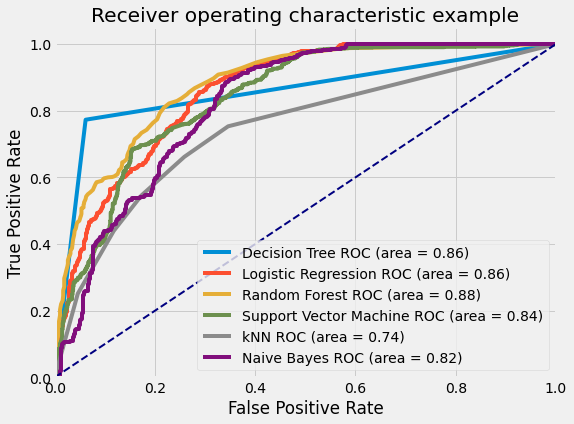

In [58]:
# fig = plt.figure(figsize=(10, 8))
# lw = 2
plt.figure(figsize=(8,6))
# Below for loop iterates through your models list
for i in models:
    if i == 'KMeans':
        continue
    model = models[i] # select the model
    y_pred = model.predict(test_x) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(test_y, model.predict_proba(test_x)[:,1])
    # Calculate Area under the curve to display on the plot
    # auc = metrics.roc_auc_score(test_y, model.predict(test_x))
    auc_ = metrics.auc(fpr, tpr)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (i, auc_))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

<Figure size 720x576 with 0 Axes>

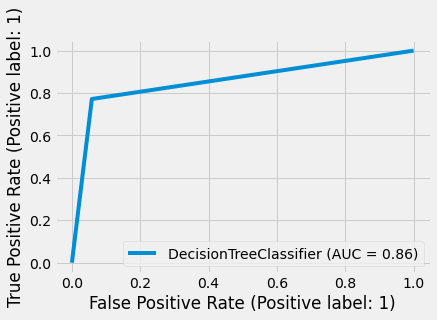

In [64]:
plt.figure(figsize=(10, 8))
dct = DecisionTreeClassifier()
dct.fit(train_x, train_y)
dct_disp = plot_roc_curve(dct, test_x, test_y)
# plt.show()

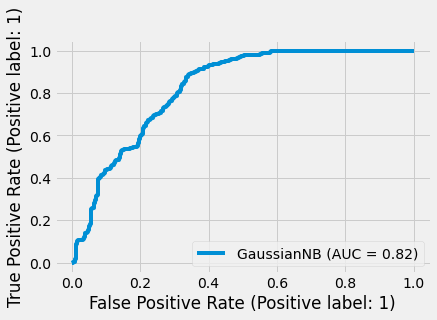

In [60]:
gnb = GaussianNB()
gnb.fit(train_x, train_y)
gnb_disp = plot_roc_curve(gnb, test_x, test_y)
# plt.show()

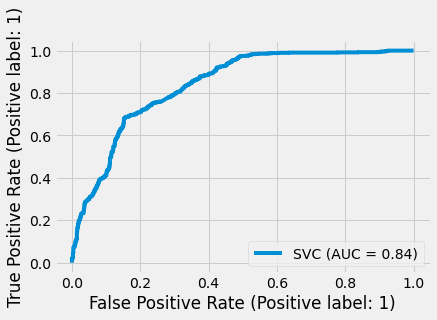

In [61]:
svc = SVC(kernel = 'sigmoid', gamma='scale', probability=True)
svc.fit(train_x, train_y)
svc_disp = plot_roc_curve(svc, test_x, test_y)

In [62]:
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()
dct = DecisionTreeClassifier()
km = KMeans(n_clusters=2, n_init=10, random_state=42)

scores = cross_val_score(dct, train_x, train_y, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.80409731 0.91165173 0.91025641 0.92435897 0.93205128 0.91923077
 0.94871795 0.94358974 0.94102564 0.93589744]
Average cross-validation score: 0.9171


In [73]:
names = ['Decision Tree', 'Support Vector Machine', 'Naive Bayes']
accuracy_scores = [85.6, 75.0, 68.3]
f1_scores = [84.3, 77.0, 63.1]
precision_scores = [93, 72, 75]
recall_scores = [77, 80, 54]

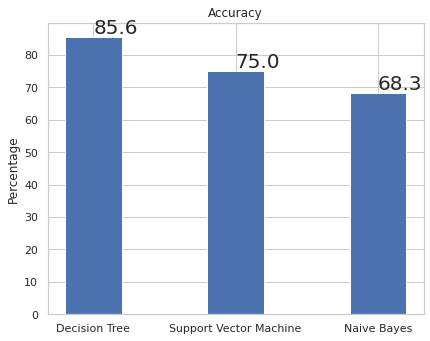

In [96]:
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (6,5))
ax.bar(names, accuracy_scores, width=0.4)

for index, data in enumerate(accuracy_scores):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=14))
# plt.tight_layout()
plt.ylabel("Percentage")
plt.title("Accuracy")
plt.show()

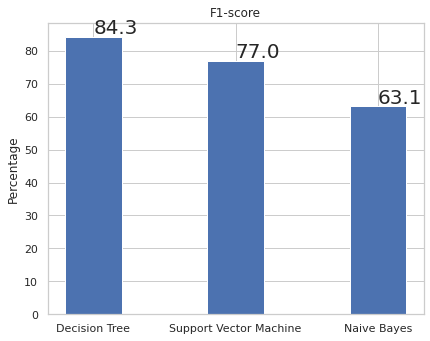

In [91]:
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (6,5))
ax.bar(names, f1_scores, width=0.4)

for index, data in enumerate(f1_scores):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=14))
# plt.tight_layout()
plt.ylabel("Percentage")
plt.title("F1-score")
plt.show()

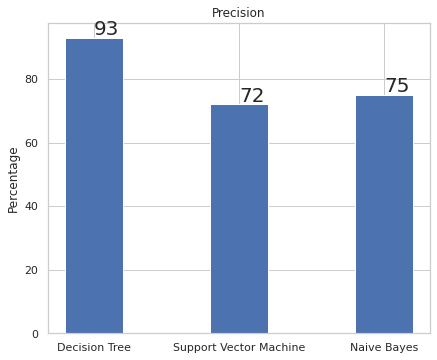

In [95]:
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (6,5))
ax.bar(names, precision_scores, width=0.4)

for index, data in enumerate(precision_scores):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=14))
plt.tight_layout()

plt.ylabel("Percentage")
plt.title("Precision")
plt.show()

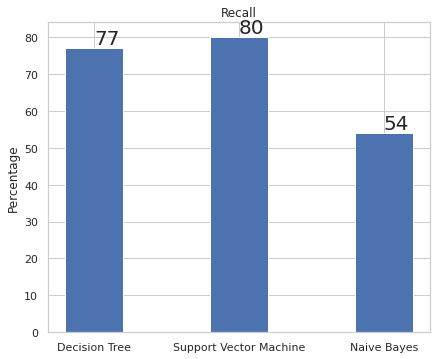

In [94]:
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (6,5))
ax.bar(names, recall_scores, width=0.4)

for index, data in enumerate(recall_scores):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=14))
plt.tight_layout()

plt.ylabel("Percentage")
plt.title("Recall")
plt.show()

## Kiểm định chéo (cross-validation)

In [97]:
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()
dct = DecisionTreeClassifier()
km = KMeans(n_clusters=2, n_init=10, random_state=42)

scores = cross_val_score(dct, train_x, train_y, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.8028169  0.91165173 0.91410256 0.92564103 0.92948718 0.91923077
 0.9525641  0.94487179 0.94230769 0.93717949]
Average cross-validation score: 0.9180
